# Packages

The cell below contains the packages that are used in the code.

In [2]:
from mesa.batchrunner import BatchRunner
from IconicityModel import *
import pandas as pd

# BatchRunner

## Helper functions

Runs the batchrunner for a certain amount of episodes and steps.

In [34]:
def run_batchrunner(model, fixed_pm, variable_pm, nb_iterations, nb_steps):
    batch_run = BatchRunner(model,
                           variable_pm,
                           fixed_pm,
                           iterations = nb_iterations,
                           max_steps = nb_steps,
                           model_reporters={"total_avg_iconicity": compute_total_average_iconicity,
                                            "l1_avg_iconicity": compute_l1_average_iconicity,
                                            "l2_avg_iconicity": compute_l2_average_iconicity})
    batch_run.run_all()
    return batch_run.get_model_vars_dataframe()

def print_dataframe(dataframe, variable_pm):
    return dataframe[[variable_pm, "Run", "L1 avg. iconicity", "L2 avg. iconicity", "Total avg. iconicity"]]

Calculates the average iconicity for each iteration.

In [35]:
def calculate_average_per_iteration(data, pm_values, nb_iterations):
    results = []
    
    for i in range(0, nb_iterations * len(pm_values), nb_iterations):
        raw_results = data[i:i + nb_iterations].tolist()
        average_result = sum(raw_results) / len(raw_results)
        results.append(average_result)
    
    return results

Plots the iconicity levels given the data and the labels.

In [36]:
def plot_average_iconicity(x_label, x_data, y_label, y_data):
    df = pd.DataFrame({x_label: x_data, y_label: y_data})
    df.plot.bar(x=x_label, y=y_label, rot=0)

Selects the data from the dataframe and generates the labels to plot by calling plot_average_iconicity.

In [37]:
def plot_average_iconicities(df, pm_values, y_label, nb_iterations):
    total_average_iconicity = df["Total avg. iconicity"]
    l1_average_iconicity = df["L1 avg. iconicity"]
    l2_average_iconicity = df["L2 avg. iconicity"]

    avg_total_iconicity_levels = calculate_average_per_iteration(total_average_iconicity, pm_values, nb_iterations)
    avg_l1_iconicity_levels = calculate_average_per_iteration(l1_average_iconicity, pm_values, nb_iterations)
    avg_l2_iconicity_levels = calculate_average_per_iteration(l2_average_iconicity, pm_values, nb_iterations)

    total_df = plot_average_iconicity(y_label, pm_values, "Total iconicity level", avg_total_iconicity_levels)
    l1_df = plot_average_iconicity(y_label, pm_values, "L1 iconicity level", avg_l1_iconicity_levels)
    l2_df = plot_average_iconicity(y_label, pm_values, "L2 iconicity level", avg_l2_iconicity_levels)

## Parameter exploration

### L2 replace chance

First we try several proportions for the replacement policy. Each value represents the chance of an agent being replaced by an L2 agent.

In [39]:
# define the values of the variable pm and amount of iterations and steps per iteration
proportions = [20, 50, 70, 90]
nb_iterations = 1
nb_steps = 20

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_chance": 20,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "learning_error_degree": 20,
            "l2_radius": 100}
variable_pm = {"l2_replace_chance": proportions}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR L2 REPLACEMENT CHANCE PARAMETER EXPLORATION")
print(" - Possible values: " + str(proportions))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
#print_dataframe(df, "l2_replace_chance")
df.l1_avg_iconicity

4it [00:00, 20.64it/s]

STATISTICS FOR L2 REPLACEMENT CHANCE PARAMETER EXPLORATION
 - Possible values: [20, 50, 70, 90]
 - Ran for 1 iteration(s) and 20 steps per iteration
 - Data from running the model for 1 iteration(s) for each parameter value:


0    0
1    0
2    0
3    0
Name: l1_avg_iconicity, dtype: int64

 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


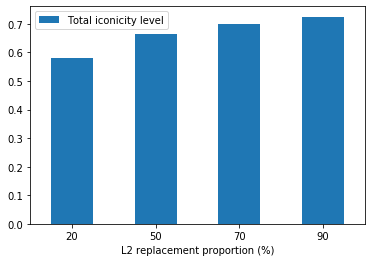

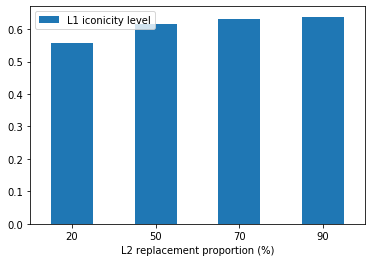

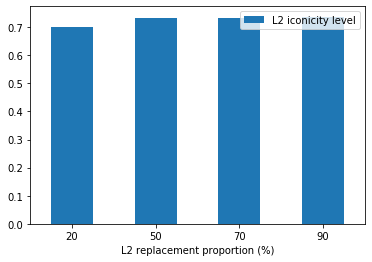

In [7]:
# draw L2 replacement proportion PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, proportions, "L2 replacement proportion (%)", nb_iterations)

### L2 radius

Then we try several radiuses from which an L2 learner can acquire signs from.

In [8]:
# define the values of the variable pm and amount of iterations and steps per iteration
radiuses = [1, 10, 30, 50, 70, 90, 100]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_chance": 20,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "learning_error_degree": 20,
            "l2_replace_chance": 50}
variable_pm = {"l2_radius": radiuses}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR L2 LEARNING RADIUS PARAMETER EXPLORATION")
print(" - Possible values: " + str(radiuses))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration\n")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
print_dataframe(df, "l2_radius")

70it [1:41:02, 86.61s/it] 

STATISTICS FOR L2 LEARNING RADIUS PARAMETER EXPLORATION
 - Possible values: [1, 10, 30, 50, 70, 90, 100]
 - Ran for 10 iteration(s) and 100 steps per iteration

 - Data from running the model for 10 iteration(s) for each parameter value:


,l2_radius,Run,L1 avg. iconicity,L2 avg. iconicity,Total avg. iconicity
0,1,0,0.61,0.73,0.66
1,1,1,0.61,0.72,0.66
2,1,2,0.64,0.74,0.69
3,1,3,0.62,0.74,0.68
4,1,4,0.62,0.73,0.67
...,...,...,...,...,...
65,100,65,0.62,0.74,0.68
66,100,66,0.59,0.72,0.66
67,100,67,0.62,0.73,0.67
68,100,68,0.61,0.73,0.66


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


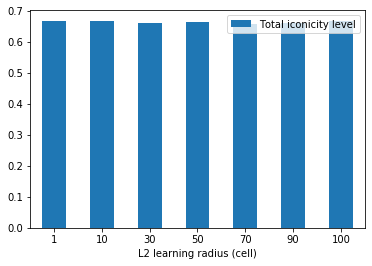

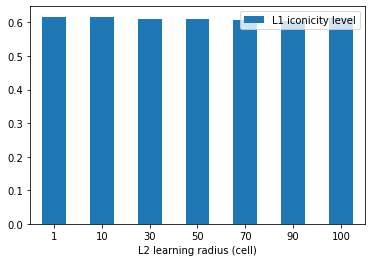

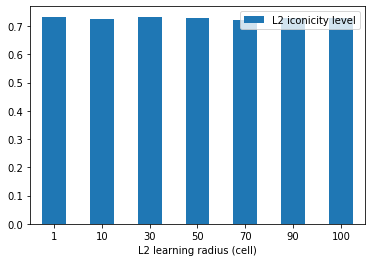

In [9]:
# draw L2 learning radius PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, radiuses, "L2 learning radius (cell)", nb_iterations)

### Turnover chance

Then we try the turnover chance of the agents. This will determine the chance of an agent dying when it has reached age 2 or higher.

In [10]:
# define the values of the variable pm and amount of iterations and steps per iteration
chances = [10, 30, 50, 70, 90]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "learning_error_degree": 20,
            "l2_radius": 100,
            "l2_replace_chance": 50}
variable_pm = {"turnover_chance": chances}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR TURNOVER CHANCE PARAMETER EXPLORATION")
print(" - Possible values: " + str(chances))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration\n")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
print_dataframe(df, "turnover_chance")

50it [2:52:17, 206.75s/it]

STATISTICS FOR TURNOVER CHANCE PARAMETER EXPLORATION
 - Possible values: [10, 30, 50, 70, 90]
 - Ran for 10 iteration(s) and 100 steps per iteration

 - Data from running the model for 10 iteration(s) for each parameter value:


,turnover_chance,Run,L1 avg. iconicity,L2 avg. iconicity,Total avg. iconicity
0,10,0,0.60,0.73,0.65
1,10,1,0.61,0.72,0.66
2,10,2,0.65,0.74,0.70
3,10,3,0.59,0.72,0.65
4,10,4,0.61,0.72,0.66
5,10,5,0.64,0.75,0.69
6,10,6,0.65,0.75,0.70
7,10,7,0.64,0.73,0.68
8,10,8,0.63,0.73,0.68
9,10,9,0.64,0.75,0.69


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


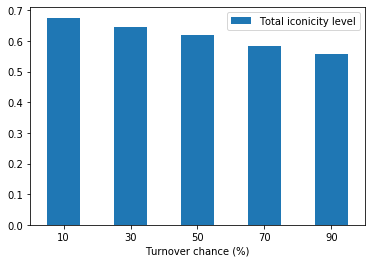

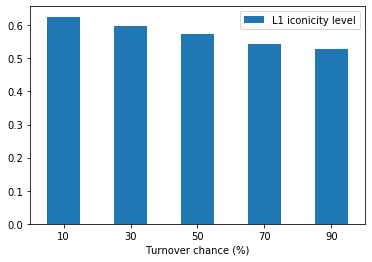

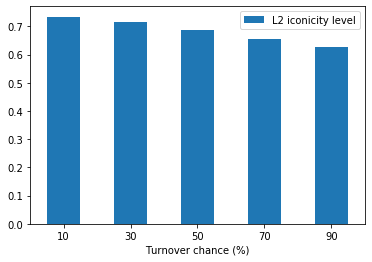

In [11]:
# draw turnover chance PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, chances, "Turnover chance (%)", nb_iterations)

### Learning error degree

Next up is the learning error degree; we will test various values that determine the error an agent makes while acquiring the phonological component of a sign.

In [12]:
# define the values of the variable pm and amount of iterations and steps per iteration
errors = [20, 40, 60, 80]
nb_iterations = 10
nb_steps = 100

# define the fixed and variable parameters
fixed_pm = {"width": 10,
            "height": 10,
            "vocab_size": 10,
            "word_length": 5,
            "turnover_chance": 20,
            "turnover_threshold": 10,
            "initial_degree_of_iconicity": 100,
            "l2_radius": 100,
            "l2_replace_chance": 50}
variable_pm = {"learning_error_degree": errors}

# run the batchrunner
df = run_batchrunner(IconicityModel, fixed_pm, variable_pm, nb_iterations, nb_steps)

# print the statistics
print("STATISTICS FOR LEARNING ERROR DEGREE PARAMETER EXPLORATION")
print(" - Possible values: " + str(errors))
print(" - Ran for " + str(nb_iterations) + " iteration(s) and " + str(nb_steps) + " steps per iteration\n")
print(" - Data from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
print_dataframe(df, "learning_error_degree")

40it [2:09:29, 194.23s/it]

STATISTICS FOR LEARNING ERROR DEGREE PARAMETER EXPLORATION
 - Possible values: [20, 40, 60, 80]
 - Ran for 10 iteration(s) and 100 steps per iteration

 - Data from running the model for 10 iteration(s) for each parameter value:


,learning_error_degree,Run,L1 avg. iconicity,L2 avg. iconicity,Total avg. iconicity
0,20,0,0.60,0.72,0.65
1,20,1,0.59,0.72,0.65
2,20,2,0.63,0.74,0.69
3,20,3,0.60,0.74,0.68
4,20,4,0.60,0.72,0.65
5,20,5,0.59,0.73,0.67
6,20,6,0.64,0.75,0.69
7,20,7,0.60,0.72,0.65
8,20,8,0.59,0.74,0.65
9,20,9,0.61,0.74,0.66


 - Iconicity levels from running the model for 10 iteration(s) for each parameter value:


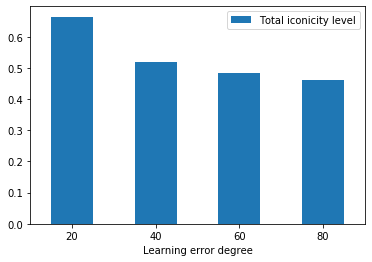

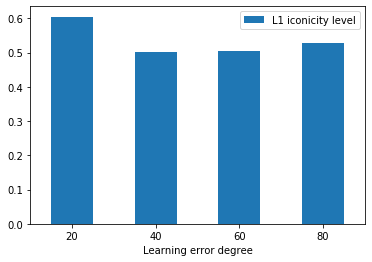

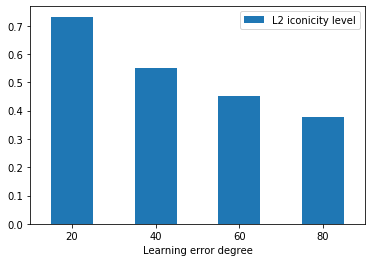

In [13]:
# draw learning error degree PM exploration
print(" - Iconicity levels from running the model for " + str(nb_iterations) + " iteration(s) for each parameter value:")
plot_average_iconicities(df, errors, "Learning error degree", nb_iterations)